# Memfilter ID Number Pelanggan dengan Format Tertentu

In [5]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# kita akan memfilter mana saja di dalam kolom customerID yang berisikan karakter selain angka dengan menggunakan
# fungsi match
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load.loc[df_load['valid_id'] == True]).drop('valid_id', axis=1)
df_load['customerID'].count()

7006

# Memfilter ID Number yang terduplicate

In [28]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values(by=['UpdatedAt'], ascending=False).drop_duplicates('customerID')
# print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())
df_load['customerID'].count()

6993

# Missing Value pada kolom Churn

In [49]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load = df_load.dropna(subset=['Churn'])
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


# Mengatasi Missing Value dengan pengisian nilai tertentu

In [68]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

# print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
# print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'] = df_load['tenure'].fillna(11)
df_load['tenure'].isnull().sum()
# print('=========================')
print(df_load.isnull().sum().sort_values(ascending=False))


#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    df_load[col_name] = df_load[col_name].fillna(df_load[col_name].mean())
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values masing-masing kolom, adalah:
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
customerID           0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitiz

# Mengatasi Outliers

### Mengetahui Oulier dengan Boxplot


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


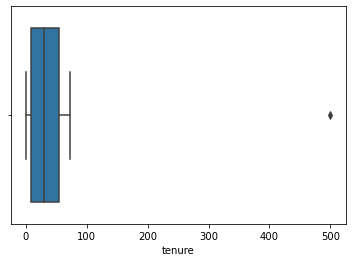

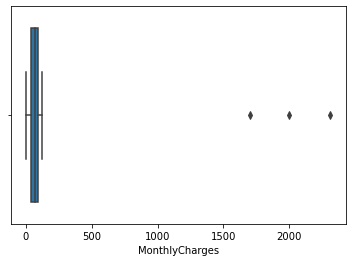

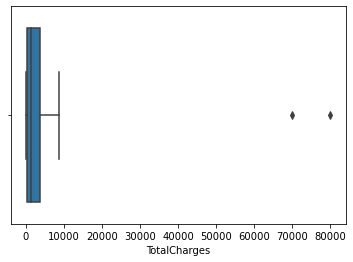

In [2]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# pertama kita akan melihat data outlier dengan boxplot
# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
# MonthlyChargaes
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

# TotalCharges
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Mengatasi Outliers dengan Mengisinya nilai quartile bawah dan quartile atas

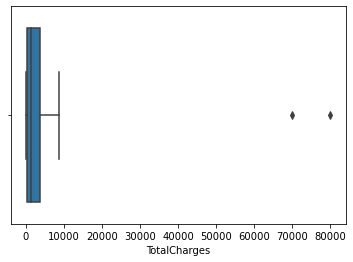

6950


In [53]:
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Ini dilakukan jika mengacu pada satu kolom

Nilai Maximum dari masing-masing Variable adalah: 
8889.13125

Nilai Minimum dari masing-masing Variable adalah: 
-4682.31875


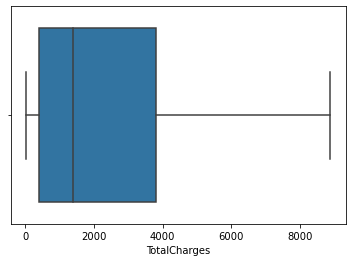

0
0


In [65]:
Q1 = df_load['TotalCharges'].quantile(0.25)
Q3 = df_load['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than     = (df_load['TotalCharges'] > maximum)
lower_than    = (df_load['TotalCharges'] < minimum)
df_load['TotalCharges'] = df_load['TotalCharges'].mask(more_than, maximum) 
df_load['TotalCharges'] = df_load['TotalCharges'].mask(lower_than, minimum)
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

print((more_than == True).sum())
print((lower_than == True).sum())

### Ini dilakukan jika ingin menginclude banyak kolom

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


C:\Users\Fikry\AppData\Local\Temp/ipykernel_2484/1753171196.py:27: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
C:\Users\Fikry\AppData\Local\Temp/ipykernel_2484/1753171196.py:28: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)


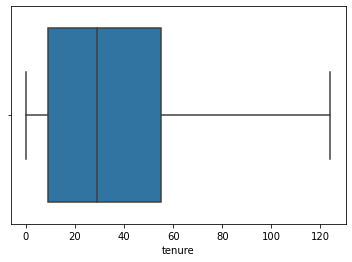

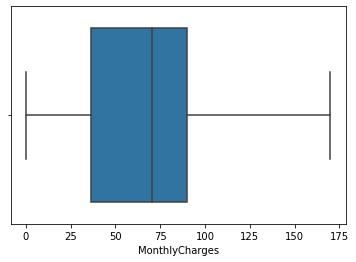

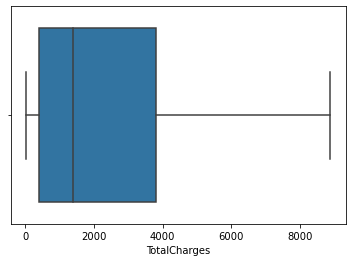

In [71]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Memeriksa outliers sekali lagi dengan boxplot
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
# MonthlyChargaes
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

# TotalCharges
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Mendeteksi Nilai yang tidak standar pada data kategorik

In [83]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

# Masukkan variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

C:\Users\Fikry\AppData\Local\Temp/ipykernel_2484/260343376.py:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
C:\Users\Fikry\AppData\Local\Temp/ipykernel_2484/260343376.py:22: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)


### Ubah nilai yang tidak standar seperti gender, Dependents, dan Churn sesuai standar

In [88]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

df_load = df_load.replace(['Iya','Wanita','Laki-Laki','Churn'],['Yes','Female','Male','Yes'])

#Loop
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized  Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized  Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized  Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


C:\Users\Fikry\AppData\Local\Temp/ipykernel_2484/3953987604.py:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
C:\Users\Fikry\AppData\Local\Temp/ipykernel_2484/3953987604.py:22: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)


In [99]:
df_load.info()
df_load['PaymentMethod'].unique()
# gender, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 0 to 2369
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   object 
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   int64  
 4   Partner           6950 non-null   object 
 5   Dependents        6950 non-null   object 
 6   tenure            6950 non-null   float64
 7   PhoneService      6950 non-null   object 
 8   MultipleLines     6950 non-null   object 
 9   InternetService   6950 non-null   object 
 10  OnlineSecurity    6950 non-null   object 
 11  OnlineBackup      6950 non-null   object 
 12  DeviceProtection  6950 non-null   object 
 13  TechSupport       6950 non-null   object 
 14  StreamingTV       6950 non-null   object 
 15  StreamingMovies   6950 non-null   object 
 16  Contract          6950 non-null   object 


array(['Electronic check', 'Bank transfer (automatic)', 'Mailed check',
       'Credit card (automatic)'], dtype=object)